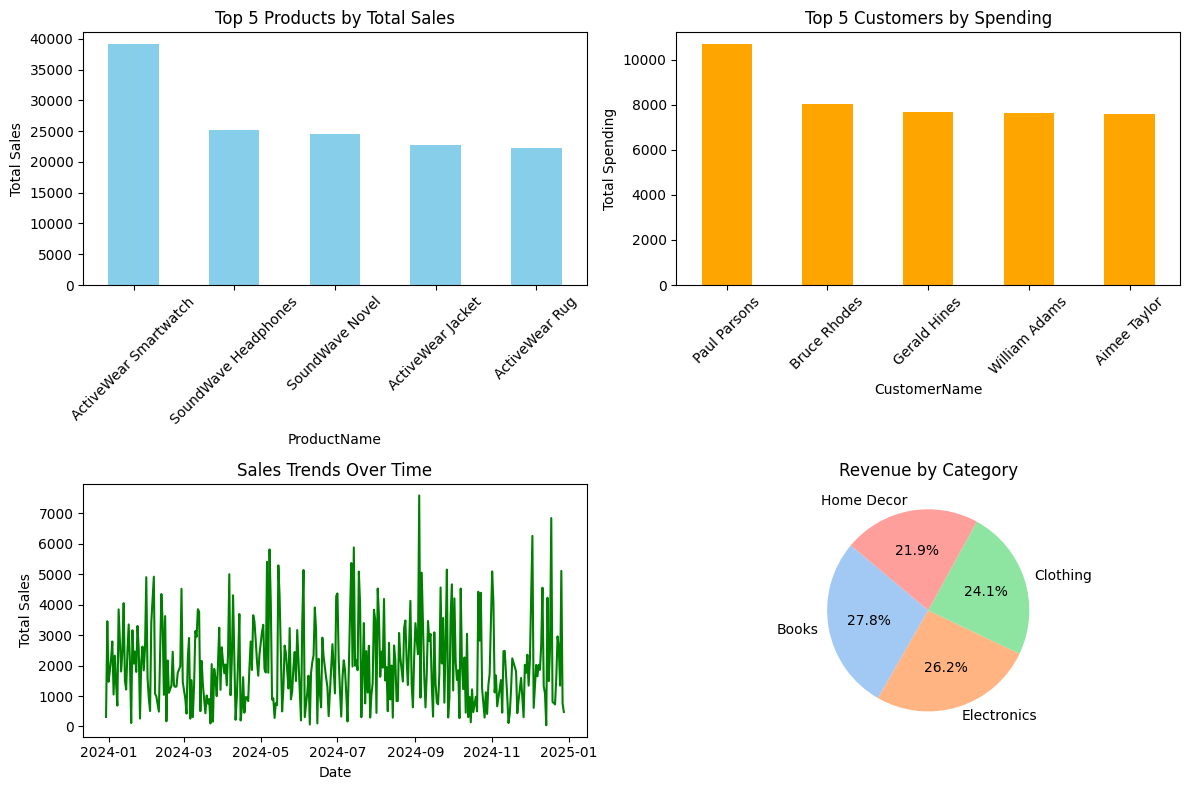

Top 5 Products by Total Sales:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

Top 5 Customers by Total Spending:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64

Category Contribution to Revenue:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Customer Region Distribution:
 Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')
customers = pd.read_csv('/content/Customers.csv')

# Merge datasets for analysis
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Top 5 Products by Total Sales
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Top 5 Customers by Total Spending
customer_spending = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Sales Trends Over Time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trends = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TotalValue'].sum()

# Product Categories Contribution to Revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Customer Region Distribution
region_distribution = merged_data['Region'].value_counts()

# Visualization
plt.figure(figsize=(12, 8))

# Top Products
plt.subplot(2, 2, 1)
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Top Customers
plt.subplot(2, 2, 2)
customer_spending.plot(kind='bar', color='orange')
plt.title('Top 5 Customers by Spending')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)

# Sales Trends
plt.subplot(2, 2, 3)
sales_trends.plot(color='green')
plt.title('Sales Trends Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')

# Category Revenue Contribution
plt.subplot(2, 2, 4)
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue by Category')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Summary Outputs
print("Top 5 Products by Total Sales:\n", product_sales)
print("\nTop 5 Customers by Total Spending:\n", customer_spending)
print("\nCategory Contribution to Revenue:\n", category_revenue)
print("\nCustomer Region Distribution:\n", region_distribution)
